## European Call Option - valuation
QuantLib Simulation

In [1]:
import QuantLib as ql
import numpy as np
import pandas as pd

In [2]:
# Get daily stock price data for AAPL stock price
AAPL_price = pd.read_csv('AAPL.csv')[['Date', 'Adj Close']].set_index('Date')
AAPL_price.head()

,Adj Close
Date,
2018-11-05,198.509583
2018-11-06,200.656265
2018-11-07,206.741821
2018-11-08,206.020493
2018-11-09,202.048096


In [3]:
AAPL_price.describe()

,Adj Close
count,250.000000
mean,192.475180
std,23.984513
min,140.505798
25%,173.279304
50%,195.165612
75%,206.497501
max,255.820007


In [4]:
AAPL_ret = AAPL_price.pct_change()[1:]
AAPL_ret.columns=['pct_change']
AAPL_ret.head()

,pct_change
Date,
2018-11-06,0.010814
2018-11-07,0.030328
2018-11-08,-0.003489
2018-11-09,-0.019282
2018-11-12,-0.050374


In [5]:
AAPL_ret.describe()

,pct_change
count,249.000000
mean,0.001206
std,0.019292
min,-0.099607
25%,-0.007682
50%,0.001517
75%,0.011235
max,0.070421


In [6]:
# get the stock's daily return stats: mean and std
AAPL_mean = float(AAPL_ret.describe().values[1])
AAPL_std = float(AAPL_ret.describe().values[2])

In [7]:
# set up a Time Grid for the simulation
calc_date = ql.Date(3, ql.November, 2019)
maturity = 31/365           # there are 31 days from Nov. 3rd to Dec. 3rd
nSteps = round(maturity*250)# convert to trade days
TimeGrid = ql.TimeGrid(nSteps, nSteps)

In [8]:
# some additional paramaters
initialValue = 255.82
r = 0.0154 # risk-free rate: 3-month T-bill rate 1.54%
sigma = AAPL_std * np.sqrt(250)
GBM = ql.GeometricBrownianMotionProcess(initialValue, r, sigma)
n = 5000

In [9]:
# generate random simulated paths of stock price
sequenceGenerator = ql.UniformRandomSequenceGenerator(len(TimeGrid), ql.UniformRandomGenerator())
gaussianSequenceGenerator = ql.GaussianRandomSequenceGenerator(sequenceGenerator)
#maturity = TimeGrid[len(TimeGrid) - 1]
pathGenerator = ql.GaussianPathGenerator(GBM, maturity, len(TimeGrid), gaussianSequenceGenerator, False)
gbm_paths = np.zeros(shape = (n, len(TimeGrid)))   
for i in range(n):
    gbm_path = pathGenerator.next().value()
    gbm_paths[i, :] = np.array([gbm_path[j] for j in range(len(TimeGrid))])

In [10]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'price')

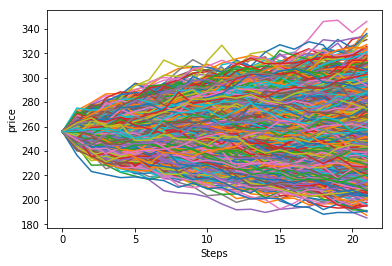

In [11]:
# visualize the price paths
for i in range(gbm_paths.shape[0]):
    path = gbm_paths[i, :] 
    plt.plot(TimeGrid, path)
plt.xlabel('Steps')
plt.ylabel('price')

In [12]:
# calculate the value of the option, by averaging all discounted payoff functions
#Strike price: 260
#3-Month T-bill rate: 1.54%
strike_price = 260
rf_rate = 0.0154
payoffs = 0
for path in gbm_paths:
    if path[-1] >= strike_price:
        payoffs = payoffs + path[-1] - strike_price
avg_payoffs = payoffs/n
option_price = avg_payoffs/ np.power((1+rf_rate), maturity)
print("calculated option price:", "%.3f" % option_price)

calculated option price: 7.148
